In [341]:
# Importing required libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


In [342]:
# Reading the data into a data frame:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [344]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## EDA and Data Prepration

In [345]:
# A particular date cannot be a good predicitor of total count and hence we will drop this column
df = df.drop('dteday', axis = 1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


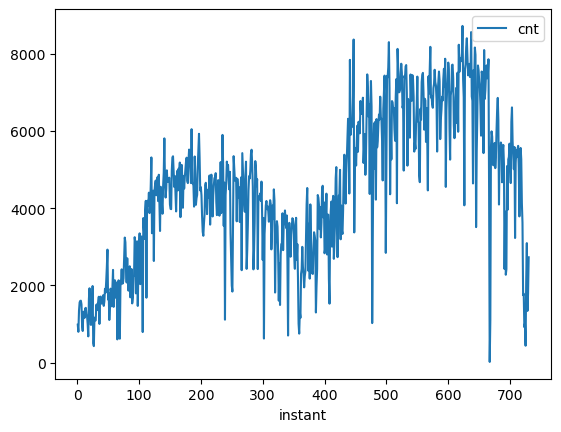

In [346]:
# we will check how count is distributed across instant's

df.plot.line(x='instant', y='cnt')
plt.show()

# From the plot we observe the following:
# 1. There is a seasonlity in the bike use, the usage tends to increase from start of the year to mid of the year and then usage
#    tends to fall
# 2. Also the usage has gone up from in 2019 in comparision to 2018


In [347]:
# Although we get a general sense of overall all trend by analysing the usage across instants, however like date
# instant cannot be a good pridicitor for the usage and hence we will drop this variable

df = df.drop('instant', axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


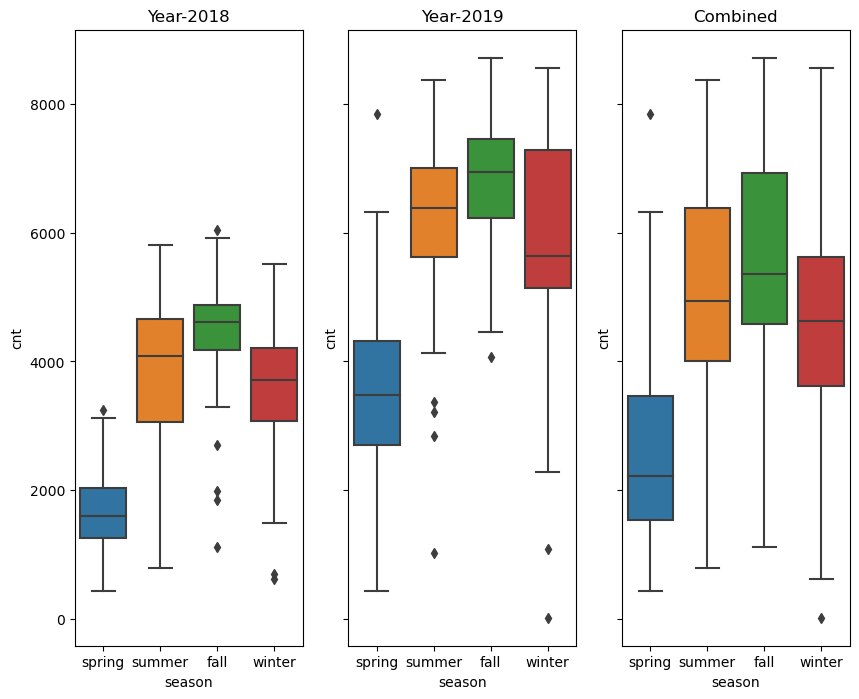

In [348]:
# Analysing usage across season
df['season'] = df['season'].apply(lambda x: 'spring' if x == 1 else ('summer' if x ==2 else ('fall' if x ==3 else 'winter')))
fig, ax = plt.subplots(1,3, sharey = True, figsize = (10,8))

sns.boxplot(x='season', y='cnt', data = df[df['yr'] == 0], ax = ax[0]).set(title = 'Year-2018')

sns.boxplot(x='season', y='cnt', data = df[df['yr'] == 1], ax = ax[1]).set(title = 'Year-2019')

sns.boxplot(x='season', y='cnt', data = df, ax =ax[2]).set(title = 'Combined')

plt.show()

# From the plot we make the following observation:
# 1. Bike usage was least in spring, it increases in summer and it kept increasing in fall and then as we approach
#    winter the usage again fall
# 2. The trend describe in point 1 is consistent in 2018 as well as 2019
# 3. Over all usage has gone up in year 1 compared to year 2, we can draw an inference that as business grows older
#    useage keeps on incresing, hence year will be a usefull variable as it is a good representation of the age of business
# 4. Season may be helpful in explaining the variablity in the bike usage

# 5. We will create 3 new variable to capture these 4 seasons
# season    winter    summer    fall
# spring      0         0        0
# summer      0         1        0
# fall        0         0        1
# winter      1         0        0

In [349]:
df = pd.concat( [df, pd.get_dummies(df['season'])], axis = 1)

# note - I am not dropping the first dummy variable because I wanted to try different permutation combination of dummy variables
#        and study its impact on VIF

df = df.drop('season', axis = 1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,fall,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0


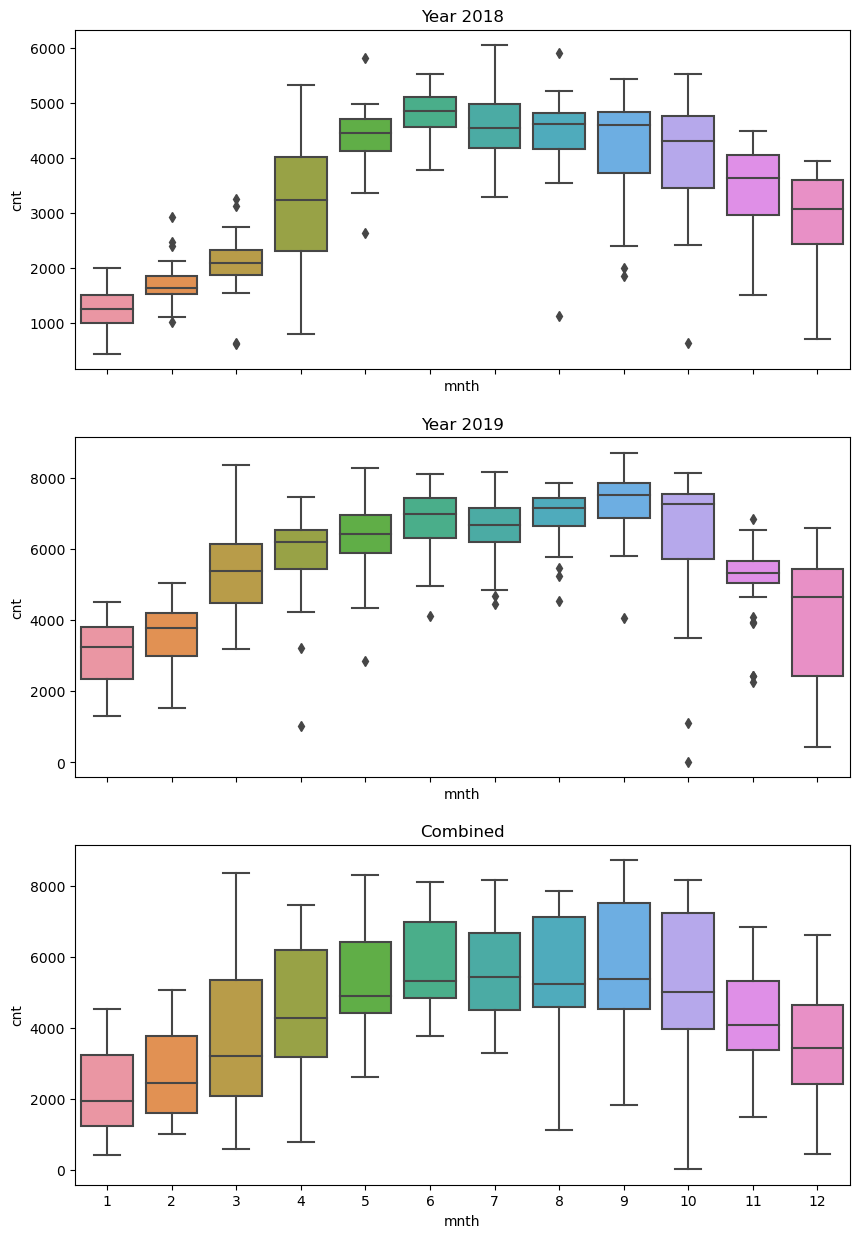

In [350]:
# Lets analyse how usage is changing on month on month basis
fig, ax = plt.subplots(3,1, sharex = True, figsize = (10,15))
sns.boxplot(x='mnth', y='cnt', data = df[df.yr == 0], ax = ax[0]).set(title = 'Year 2018')
sns.boxplot(x='mnth', y='cnt', data = df[df.yr == 1], ax = ax[1]).set(title = 'Year 2019')
sns.boxplot(x='mnth', y='cnt', data = df, ax = ax[2]).set(title = 'Combined')
plt.show()

# From the below box plots we can see that usage pattern across month is resembling the usage across season
# and it is intitutive since seasons are nothing but aggreation of months

# Hence we will not use month as a variable but rather use season as it represent more general information

In [351]:
df = df.drop('mnth', axis = 1)
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,fall,spring,summer,winter
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0


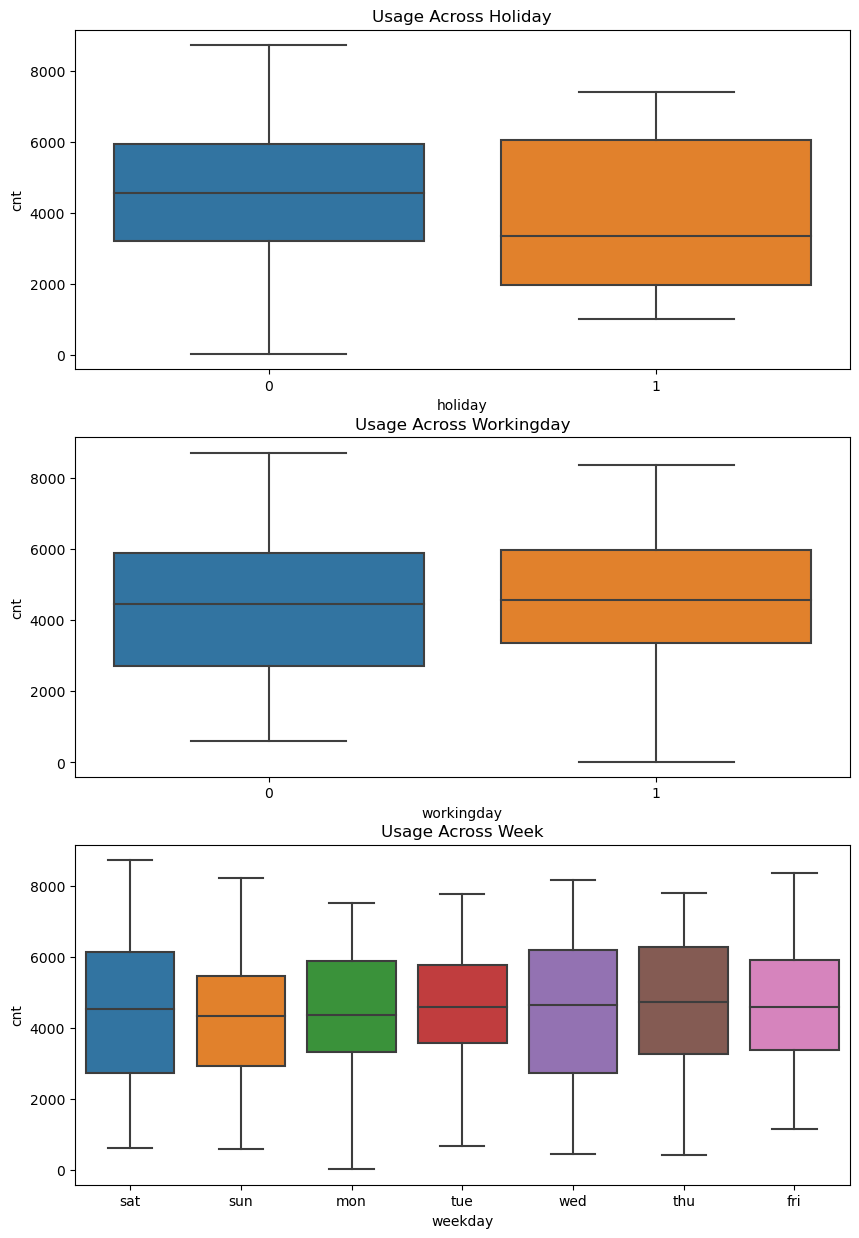

In [352]:
# we will analyse how the usage is across holiday, weekday and workingday
# Note: although mapping for weekday was note provided in the data disctionary, however if we combine weekday and working day
# we can deduce that information
df['weekday'] = df['weekday'].apply(lambda x : 'sun' if x == 0 else ('mon' if x==1 else ('tue' if x==2 else ('wed' if x==3 else ('thu' if x==4 else ('fri' if x==5 else 'sat'))))))
fig, ax = plt.subplots(3,1,figsize = (10,15))
sns.boxplot(x = 'holiday', y = 'cnt', data = df, ax = ax[0]).set(title = 'Usage Across Holiday')
sns.boxplot(x = 'workingday', y = 'cnt', data = df, ax = ax[1]).set(title = 'Usage Across Workingday')
sns.boxplot(x = 'weekday', y = 'cnt', data = df, ax = ax[2]).set(title = 'Usage Across Week')
plt.show()

#Observation
# 1. When holiday is 1 i.e. during holiday we see a signiicant reduction in median usage
# 2. When working day is 1 i.e. during working day we have observed a higher median usage than when it is not a working day
# 3. Weekday attribute represent Sun, Mon, Tue, Wed, Thur, Fri, Sat as 0, 1, 2, 3, 4, 5, 6 respectively
# 4. Median usage increase from Monday till Thursday and then from friday ownward it falls till sunday
# 5. It is evident that weekday, holiday and workingday has influence over usage,also there is some seasonility 
#    accross the weekday, hence we will use all of them as independent variable
# 6. Creating 6 dummy variable using weekday
# Weekday    Mon    Tue    Wed    Thr    Fri    Sat
# Sun         0      0      0      0      0      0
# Mon         1      0      0      0      0      0
# Tue         0      1      0      0      0      0
# Wed         0      0      1      0      0      0
# Thr         0      0      0      1      0      0
# Fri         0      0      0      0      1      0
# Sat         0      0      0      0      0      1

In [353]:
df = pd.concat([df, pd.get_dummies(df['weekday'])], axis = 1)
df = df.drop('weekday', axis = 1)

# note - I am not dropping the first dummy variable because I wanted to try different permutation combination of dummy variables
#        and study its impact on VIF

df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,spring,summer,winter,fri,mon,sat,sun,thu,tue,wed
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,1,0,0,0,0,0,0,0,0,1


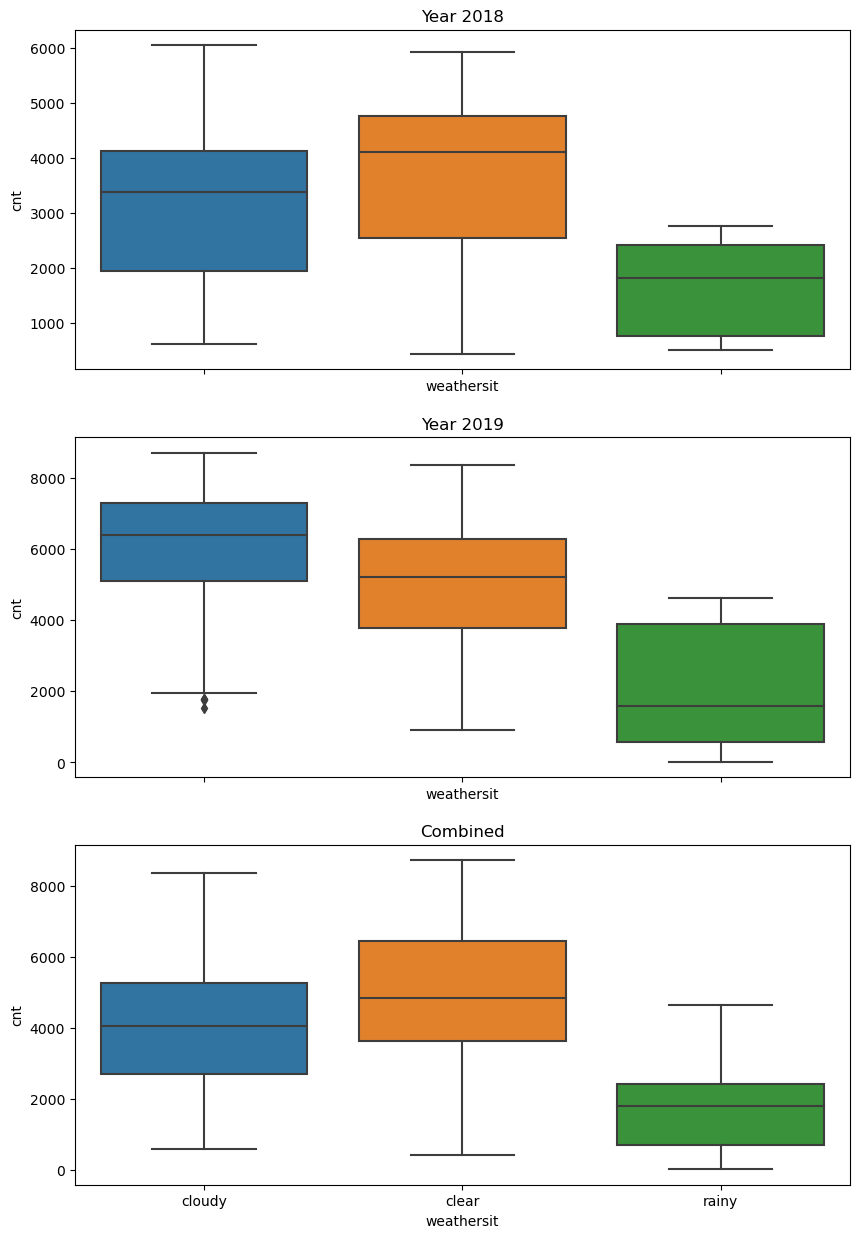

In [354]:
# analysing usage across weathersit
df['weathersit']  = df['weathersit'].apply(lambda x: 'clear' if x==1 else ('cloudy' if x ==2 else 'rainy'))

fig, ax = plt.subplots(3,1, sharex = True, figsize = (10,15))
sns.boxplot(x='weathersit', y='cnt', data = df[df.yr == 0], ax = ax[0]).set(title = 'Year 2018')
sns.boxplot(x='weathersit', y='cnt', data = df[df.yr == 1], ax = ax[1]).set(title = 'Year 2019')
sns.boxplot(x='weathersit', y='cnt', data = df, ax = ax[2]).set(title = 'Combined')
plt.show()

# 1. usage is heighest when its wheather situation is 1 i.e. Clear Weather, followed by Partially Cloudy (weathersit = 2)
#    and least when there is either rain or snow (weathersit = 3)
# 2. Also we have no record when weather is really bad i.e. weathersit = 4, however
#    it is safe to assume that in such weather there will not be any usage of bycycle
# 3. Hence for our model purpose we will assume that weather situation can only take three value i.e. 1,2 or 3
#    and we will create dummy variables for it
# 4. WeatherSit    Cloudy   Rainy
#    Clear           0        0
#    Cloudy          1        0
#    Rainy           0        1

In [355]:
df = pd.concat([df, pd.get_dummies(df.weathersit)], axis = 1)
df = df.drop('weathersit', axis = 1)

# note - I am not dropping the first dummy variable because I wanted to try different permutation combination of dummy variables
#        and study its impact on VIF

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,fri,mon,sat,sun,thu,tue,wed,clear,cloudy,rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,1,1,0,0


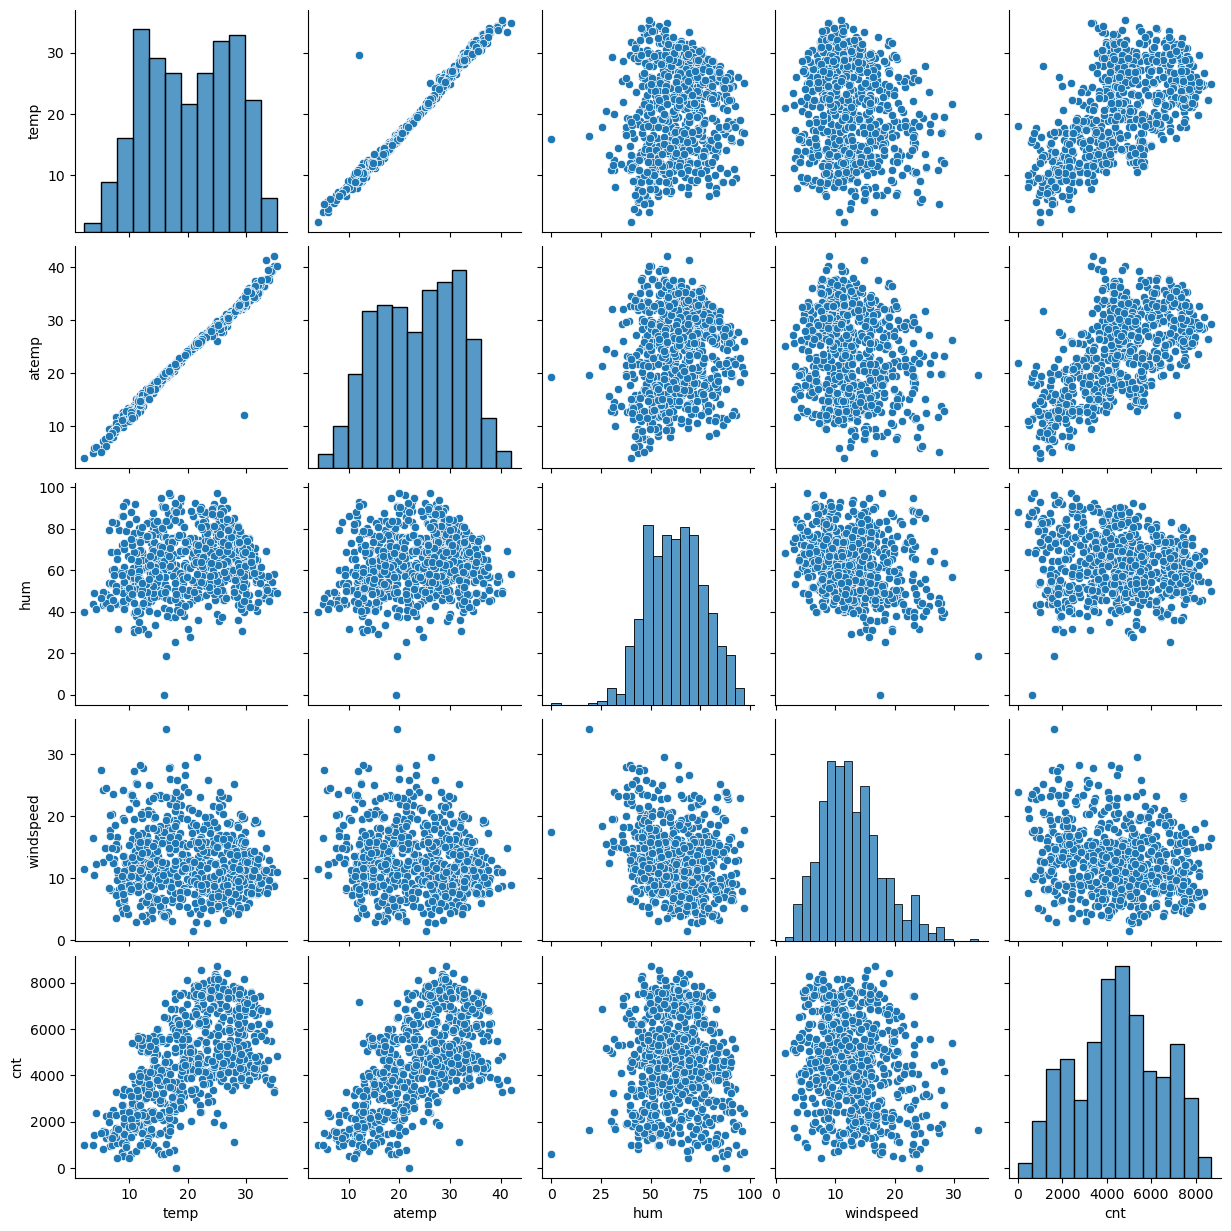

In [356]:
# Analysing usage across temp, atemp, hum, windspeed
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

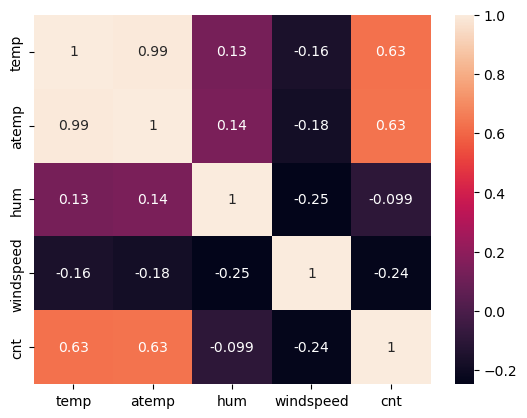

In [357]:
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

In [358]:
# Observation from the analysis of usage across temp, atemp, hum, windspeed
# 1. Usage show some linear relation with temp and atemp, however temp and atemp shows a very very strong
#    linear relation with each other. Hence we will use only temp.
# 2. Humidity and Windspeed doesn't exibhit any sort of relation with usage, however we will keep these two variable
#    for now and we will decide later if these needs to be dropped or retained

df = df.drop('atemp', axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,fall,...,fri,mon,sat,sun,thu,tue,wed,clear,cloudy,rainy
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,0,...,0,0,0,0,0,0,1,1,0,0


In [359]:
# Since our target variable is cnt, we will be dropping attribute casual and registered
df = df.drop(['casual','registered'], axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,fri,mon,sat,sun,thu,tue,wed,clear,cloudy,rainy
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,1,1,0,0


### Train Test Split (70:30)

In [360]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape, df_test.shape)

(510, 21) (220, 21)


### Min Max Scaling

In [361]:
num_var = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])

In [362]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,fri,mon,sat,sun,thu,tue,wed,clear,cloudy,rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.262745,0.243137,0.247059,...,0.127451,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.440557,0.429398,0.431725,...,0.333805,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [363]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,fri,mon,sat,sun,thu,tue,wed,clear,cloudy,rainy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.245455,0.254545,0.263636,...,0.177273,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.431338,0.436599,0.441609,...,0.382770,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [364]:
# Creating X_train, X_test, y_train and y_test
X_cols = ['yr', 'holiday', 'workingday', 'spring', 'summer', 'fall', 'winter', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat',
       'cloudy', 'rainy', 'temp', 'hum', 'windspeed']
y_cols = 'cnt'

X_train = df_train[X_cols]
y_train = df_train[y_cols]

X_test = df_test[X_cols]
y_test = df_test[y_cols]

In [365]:
X_train.head()

,yr,holiday,workingday,spring,summer,fall,winter,mon,tue,wed,thu,fri,sat,cloudy,rainy,temp,hum,windspeed
576,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0.815169,0.725633,0.264686
426,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.245101,0.498067,0.663106
482,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475
111,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.345824,0.751824,0.380981


In [366]:
X_test.head()

,yr,holiday,workingday,spring,summer,fall,winter,mon,tue,wed,thu,fri,sat,cloudy,rainy,temp,hum,windspeed
184,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0.901354,0.610133,0.153728
299,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0.511964,0.837699,0.334206
221,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.881625,0.437098,0.339570
152,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0.817246,0.314298,0.537414


In [367]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [368]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

# Model Building

In [369]:
# We will first build a model with all the variables and check the significance of all the variable
# Also we will check the R2, R2_adj and VIF based on these metrics we will refine our model

model_1_var = ['yr', 'holiday', 'workingday', 'summer', 'fall', 'winter', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat','cloudy', 'rainy', 'temp', 'hum', 'windspeed']

X_train_1_sm = sm.add_constant(X_train[model_1_var])
model_1 = sm.OLS(y_train,X_train_1_sm).fit()

print(model_1.summary())

# VIF for the independent variable

def model_vif(X_sm):
    X = X_sm.drop('const', axis = 1)
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = 'vif', ascending=False)
    return vif

vif_1 = model_vif(X_train_1_sm)
print(vif_1)

# Observations:
# 1. We can see that the VIF of mon, tue, wed, thu, fri is approaching infinity, which is what we suspected at the begining
#    since workingday and holiday capture the very same information at aggregate level. Although VIF for sat is low, however
#    if we are dropping other weekdays it don't make sense to keep this one alone.


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.33e-180
Time:                        16:12:19   Log-Likelihood:                 496.28
No. Observations:                 510   AIC:                            -958.6
Df Residuals:                     493   BIC:                            -886.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1691      0.030      5.661      0.0

In [370]:
model_2_var = ['yr', 'holiday', 'workingday', 'summer', 'fall', 'winter', 'cloudy', 'rainy', 'temp', 'hum', 'windspeed']

X_train_2_sm = sm.add_constant(X_train[model_2_var])
model_2 = sm.OLS(y_train, X_train_2_sm).fit()

print(model_2.summary())
print(model_vif(X_train_2_sm))

# 1. Even after dropping 6 features the R2 has just come down by 0.6% and adjusted R2 has come down by 0.4%, which implies that
#    these features are indeed redundant and doesn't explain any new variance in the traget variable
# 2. Intitutively speaking holiday and workingday are complementary i.e. if it is holiday then it cannot be a workingday and 
#     vice-versa and we can represent one variable with other, hence we will drop holiday as variable and see the impact


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.22e-182
Time:                        16:12:19   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     498   BIC:                            -900.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2063      0.029      7.205      0.0

In [371]:
model_3_var = ['yr', 'workingday', 'summer', 'fall', 'winter', 'cloudy', 'rainy', 'temp', 'hum', 'windspeed']

X_train_3_sm = sm.add_constant(X_train[model_3_var])
model_3 = sm.OLS(y_train, X_train_3_sm).fit()

print(model_3.summary())
print(model_vif(X_train_3_sm))

# Observations:
# 1. All the independent variables and the overall model are significant
# 2. R-squared and Adj R-Squared is 82.5% and 82.2% respectively
# 3. We still have few variables with quite high VIF like temp, hum, fall
# 4. Lets drop hum and see the impact. ALso note that although temp has higher VIF but we have decided to drop hum because
#    temp has shown higher correlation with the target variable

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          5.55e-182
Time:                        16:12:19   Log-Likelihood:                 484.03
No. Observations:                 510   AIC:                            -946.1
Df Residuals:                     499   BIC:                            -899.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1997      0.029      6.956      0.0

In [372]:
# model after dropping hum

model_4_var = ['yr', 'workingday', 'summer', 'fall', 'winter', 'cloudy', 'rainy', 'temp', 'windspeed']

X_train_4_sm = sm.add_constant(X_train[model_4_var])
model_4 = sm.OLS(y_train, X_train_4_sm).fit()

print(model_4.summary())
print(model_vif(X_train_4_sm))

# Observation:
# 1. There is hardly any reduction in the R-square and Adj R-square after dropping hum
# 2. Temp VIF has come down a lot, there by increasing the interpretability of the model
# 3. All the independent variable and overall model is still significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.8
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.87e-180
Time:                        16:12:19   Log-Likelihood:                 477.56
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     500   BIC:                            -892.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1204      0.018      6.508      0.0

In [373]:
# model after including hum back and dropping temp
model_5_var = ['yr', 'workingday', 'summer', 'fall', 'winter', 'cloudy', 'rainy', 'hum', 'windspeed']

X_train_5_sm= sm.add_constant(X_train[model_5_var])

model_5 = sm.OLS(y_train, X_train_5_sm).fit()

print(model_5.summary())
print(model_vif(X_train_5_sm))

# Observation:
# 1. Both R-square and Adj R-square have reduced siginificantly
# 2. hum has become insignificant and still have VIF above 10, 
# 3. However VIF of fall has reduced significantly which suggest a temp and fall have high corr
# 4. We will drop hum and retain temp as independent variable


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     170.6
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.27e-146
Time:                        16:12:19   Log-Likelihood:                 396.83
No. Observations:                 510   AIC:                            -773.7
Df Residuals:                     500   BIC:                            -731.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2668      0.034      7.948      0.0

In [374]:
# replacing fall with spring and retaining temp and hum

model_6_var = ['yr', 'workingday', 'spring','summer', 'winter', 'cloudy', 'rainy', 'temp', 'hum', 'windspeed']

X_train_6_sm = sm.add_constant(X_train[model_6_var])
model_6 = sm.OLS(y_train, X_train_6_sm).fit()

print(model_6.summary())
print(model_vif(X_train_6_sm))

# Observation:
# 1. Dropping fall alone doesn't impact the R square and Adj R square much
# 2. VIF of temp and hum is still high
# 3. All independent variable and overall model is siginificant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          5.55e-182
Time:                        16:12:19   Log-Likelihood:                 484.03
No. Observations:                 510   AIC:                            -946.1
Df Residuals:                     499   BIC:                            -899.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2752      0.036      7.593      0.0

In [375]:
# replacing fall with spring and dropping hum
model_7_var = ['yr', 'workingday','spring', 'summer', 'winter', 'cloudy', 'rainy', 'temp', 'windspeed']

X_train_7_sm = sm.add_constant(X_train[model_7_var])
model_7 = sm.OLS(y_train, X_train_7_sm).fit()

print(model_7.summary())
print(model_vif(X_train_7_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.8
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.87e-180
Time:                        16:12:19   Log-Likelihood:                 477.56
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     500   BIC:                            -892.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2038      0.031      6.654      0.0

In [376]:
# 1. Model_4 and model_7 have same independent variable except "fall" which is was used in model_4 and it was replace 
#    with "spring" in model_7. For now we will consider both model_4 and model_7 and perform some residual analysis.
# 2. Secondly we will also check the performance on test sample



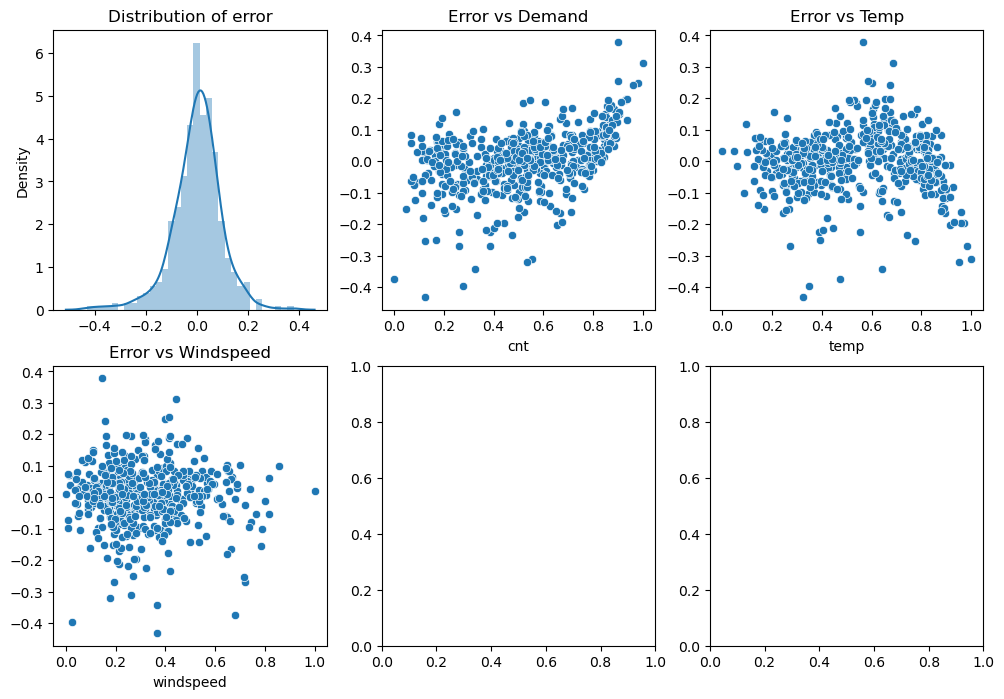

In [377]:
# Error Analysis of model_4:
y_train_4_pred = model_4.predict(X_train_4_sm)
residual_train_4 = y_train - y_train_4_pred
fig, ax = plt.subplots(2,3, figsize = (12,8))
sns.distplot(residual_train_4, ax = ax[0,0]).set(title = 'Distribution of error')
sns.scatterplot(y = residual_train_4,x = y_train, ax = ax[0,1] ).set(title = 'Error vs Demand')
sns.scatterplot(y = residual_train_4,x = X_train['temp'], ax = ax[0,2]).set(title = 'Error vs Temp')
sns.scatterplot(y = residual_train_4,x = X_train['windspeed'], ax = ax[1,0]).set(title = 'Error vs Windspeed')
plt.show()


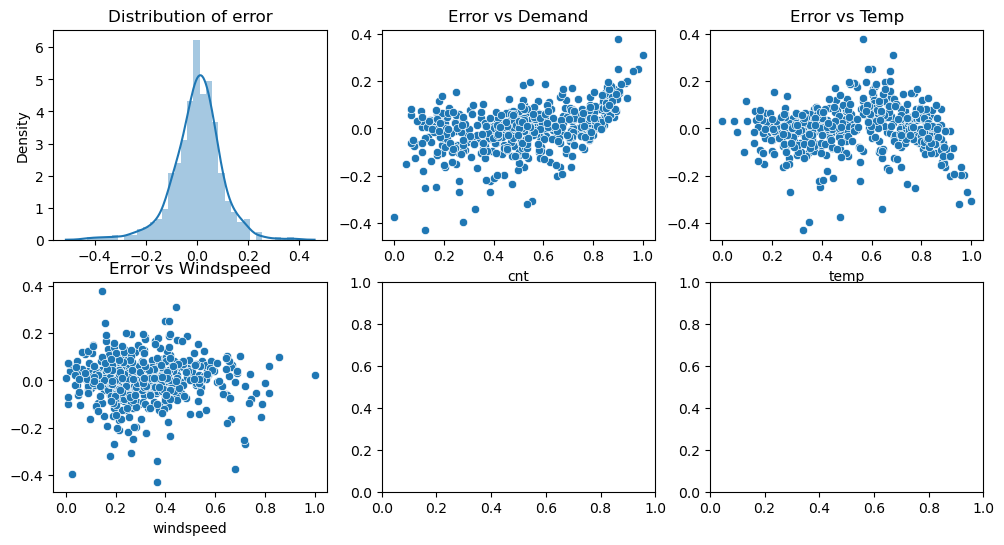

In [378]:
# Error Analysis of model_7:
y_train_7_pred = model_7.predict(X_train_7_sm)
residual_train_7 = y_train - y_train_7_pred
fig, ax = plt.subplots(2,3, figsize = (12,6))
sns.distplot(residual_train_7, ax = ax[0,0]).set(title = 'Distribution of error')
sns.scatterplot(y = residual_train_7,x = y_train, ax = ax[0,1] ).set(title = 'Error vs Demand')
sns.scatterplot(y = residual_train_7,x = X_train['temp'], ax = ax[0,2]).set(title = 'Error vs Temp')
sns.scatterplot(y = residual_train_7,x = X_train['windspeed'], ax = ax[1,0]).set(title = 'Error vs Windspeed')
plt.show()

In [379]:
# Both model seems ok by means of eror analysis since for both model the residual is approaching a normal distribution
# with a mean approxmiately around 0. Also residual seems like randomly distributed.


In [380]:
### Preditction on test data using all models and checking the R_Square of all models

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]
model_var = [model_1_var, model_2_var, model_3_var, model_4_var, model_5_var, model_6_var, model_7_var]

i=0

for lm, var in zip(models, model_var):
    i = i+1
    y_train_pred = lm.predict(sm.add_constant(X_train[var]))
    y_test_pred = lm.predict(sm.add_constant(X_test[var]))
   
    r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)
    r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
    
    print(f'For Model {i}: R-Squared on training set and test set is {r2_train} and {r2_test} respectively.')
    
# Observations:
# 1. Model 4 which have 'yr', 'workingday', 'summer', 'fall', 'winter', 'cloudy', 'rainy', 'temp', 'windspeed' as independent
#    and model 7 have used the same variable as model 4 except fall has been replaced by spring
# 2. Although VIF of variable 'fall' and 'temp' in model 4 is high, however from model 5 it is evident that 'temp' is an
#    important predictor and hence temp cannot be dropped.
# 3. We will use model 7


For Model 1: R-Squared on training set and test set is 0.8336464348188017 and 0.8086983684749443 respectively.
For Model 2: R-Squared on training set and test set is 0.8280284410573853 and 0.8064632134212596 respectively.
For Model 3: R-Squared on training set and test set is 0.8254634473949909 and 0.8032939054014072 respectively.
For Model 4: R-Squared on training set and test set is 0.8209731195110399 and 0.7984052963442712 respectively.
For Model 5: R-Squared on training set and test set is 0.7543033485746993 and 0.7419539774000768 respectively.
For Model 6: R-Squared on training set and test set is 0.8254634473949909 and 0.803293905401407 respectively.
For Model 7: R-Squared on training set and test set is 0.8209731195110399 and 0.798405296344271 respectively.


In [381]:
# Before we finalze model 7, lets change the dummy code for season and weather situation
# and then see if it has any impact on VIF and overall model

df = pd.read_csv('day.csv')

df[['spring','summer','fall','winter']] = pd.get_dummies(df['season'])
df[['clear','cloudy','rainy']] = pd.get_dummies(df.weathersit)

df = df.drop(['season','dteday', 'instant', 'mnth', 'weekday','holiday', 'weathersit', 'atemp', 'casual', 'registered'], axis = 1)



df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
num_var = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])
y_train = df_train.pop('cnt')
y_test = df_test.pop('cnt')
X_train = df_train
X_test = df_test

# keeping spring summer fall with clear & cloudy
model_v2_1 = [ 'yr', 'workingday','spring', 'summer', 'fall', 'clear', 'cloudy','temp', 'windspeed']
# keeping spring summer winter with clear & cloudy
model_v2_2 = [ 'yr', 'workingday','spring', 'summer', 'winter', 'clear', 'cloudy','temp', 'windspeed']
# keeping spring winter fall with clear & cloudy
model_v2_3 = [ 'yr', 'workingday','spring', 'winter', 'fall', 'clear', 'cloudy','temp',  'windspeed']
# keeping winter summer fall with clear & cloudy
model_v2_4 = [ 'yr', 'workingday','winter', 'summer', 'fall', 'clear', 'cloudy','temp',  'windspeed']
# keeping spring summer fall with clear & rainy
model_v2_5 = [ 'yr', 'workingday','spring', 'summer', 'fall', 'clear', 'rainy','temp',  'windspeed']
# keeping spring summer winter with clear & rainy
model_v2_6 = [ 'yr', 'workingday','spring', 'summer', 'winter', 'clear', 'rainy','temp',  'windspeed']
# keeping spring winter fall with clear & rainy
model_v2_7 = [ 'yr', 'workingday','spring', 'winter', 'fall', 'clear', 'rainy','temp',  'windspeed']
# keeping winter summer fall with clear & rainy
model_v2_8 = [ 'yr', 'workingday','winter', 'summer', 'fall', 'clear', 'rainy','temp',  'windspeed']
# keeping spring summer fall with cloudy & rainy
model_v2_9 = [ 'yr', 'workingday','spring', 'summer', 'fall', 'cloudy', 'rainy','temp', 'windspeed']
# keeping spring summer winter with cloudy & rainy
model_v2_10 = [ 'yr', 'workingday','spring', 'summer', 'winter', 'cloudy', 'rainy','temp',  'windspeed']
# keeping spring winter fall with cloudy & rainy
model_v2_11 = [ 'yr', 'workingday','spring', 'winter', 'fall', 'cloudy', 'rainy','temp',  'windspeed']
# keeping winter summer fall with cloudy & rainy
model_v2_12 = [ 'yr', 'workingday','winter', 'summer', 'fall', 'cloudy', 'rainy','temp', 'windspeed']

# Dropping both seasonility and weather situation
model_v2_13 = [ 'yr', 'workingday', 'temp',  'windspeed']

# keeping only weather situation but not seasonility
model_v2_14 = [ 'yr', 'workingday', 'cloudy', 'rainy','temp',  'windspeed'] # cloudy and rainy
model_v2_15 = [ 'yr', 'workingday', 'cloudy', 'clear','temp',  'windspeed'] # cloudy and clear
model_v2_16 = ['yr', 'workingday', 'clear', 'rainy','temp',  'windspeed'] # clear and rainy

# kepping only seasonility but not weather
model_v2_17 = [ 'yr', 'workingday','spring', 'summer', 'fall', 'temp',  'windspeed'] # spring/summer/fall
model_v2_18 = [ 'yr', 'workingday','spring', 'summer', 'winter', 'temp',  'windspeed'] # spring/summer/fall
model_v2_19 = [ 'yr', 'workingday','spring', 'winter', 'fall', 'temp',  'windspeed'] # spring/summer/fall
model_v2_20 = ['yr', 'workingday','winter', 'summer', 'fall', 'temp',  'windspeed'] # spring/summer/fall


var = [model_v2_1, model_v2_2, model_v2_3, model_v2_4, model_v2_5, model_v2_6, model_v2_7, model_v2_8, model_v2_9, model_v2_10,
      model_v2_11, model_v2_12, model_v2_13, model_v2_14, model_v2_15, model_v2_16, model_v2_17, model_v2_18, model_v2_19, model_v2_20]
i = 0
for x in var:
    
    i=i+1
    X_train_sm = sm.add_constant(X_train[x])
    X_test_sm = sm.add_constant(X_test[x])
    
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    train_r2 = lm.rsquared
    train_adj_r2 = lm.rsquared_adj
    
    y_test_pred = lm.predict(X_test_sm)
    
    test_r2 = r2_score(y_true= y_test, y_pred=y_test_pred)
    
    print(f'--------------------------Result for Model_v2_{i}------------------------------')
    print(f'R2_score in training is {train_r2}')
    print(f'Adj. R2_score in training is {train_adj_r2}')
    print(f'R2_score on test set is {test_r2}')
    print(f'VIF for Model_v2_{i}:')
    print(model_vif(X_train_sm))
    


--------------------------Result for Model_v2_1------------------------------
R2_score in training is 0.8209731195110399
Adj. R2_score in training is 0.8177506356622386
R2_score on test set is 0.798405296344271
VIF for Model_v2_1:
     features        vif
7        temp  17.360430
5       clear   9.876230
6      cloudy   5.538931
8   windspeed   4.368422
4        fall   3.960664
1  workingday   3.002729
3      summer   2.359924
2      spring   2.295414
0          yr   2.071948
--------------------------Result for Model_v2_2------------------------------
R2_score in training is 0.8209731195110399
Adj. R2_score in training is 0.8177506356622386
R2_score on test set is 0.7984052963442712
VIF for Model_v2_2:
     features        vif
5       clear  13.969975
7        temp  11.975417
6      cloudy   7.889822
8   windspeed   4.584700
2      spring   3.804167
1  workingday   3.030732
4      winter   2.421854
3      summer   2.240372
0          yr   2.073192
--------------------------Result for 

--------------------------Result for Model_v2_20------------------------------
R2_score in training is 0.7621856424066997
Adj. R2_score in training is 0.7588695059462354
R2_score on test set is 0.755842714236704
VIF for Model_v2_20:
     features        vif
5        temp  14.967886
4        fall   6.141609
3      summer   3.324076
6   windspeed   3.262330
1  workingday   2.771258
2      winter   2.325585
0          yr   2.021729


In [382]:
# Onservatios:
# 1. From model_v2_13 to model_v2_20 it is clear that both weather situation and season are important predictors
# 2. Fromt the resutls of reste of the models i.e. model_v2_1 to model_v2_12 we observe that temp, fall and clear weather
#    show higher correlation and hence whenever we use any two or three together we get high VIF, hence to represent season 
#    we will use spring, summer and winter and to represent weather situation we will use cloudy and rainy i.e. model_v2_10
# 3. Our Final model is Model_v2_10 which is same as model_7
# 4. Predictors: 'yr', 'workingday','spring', 'summer', 'winter', 'cloudy', 'rainy','temp',  'windspeed'

In [383]:
# Model_4_10

model_4_10
X_train_sm = sm.add_constant(X_train[model_4_10])
X_test_sm = sm.add_constant(X_test[model_4_10])

final_model = sm.OLS(y_train, X_train_sm).fit()

y_test_pred = final_model.predict(X_test_sm)

test_r2 = r2_score(y_true= y_test, y_pred=y_test_pred)

print('----------------------------Here is our final model---------------------------\n')
print(final_model.summary(),'\n')
print('VIF of independent variable:\n',model_vif(X_train_sm))
print(f'\nR-Square on the test data set is: {test_r2}')



----------------------------Here is our final model---------------------------

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.8
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.87e-180
Time:                        16:12:22   Log-Likelihood:                 477.56
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     500   BIC:                            -892.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

## Model interpretation:
1. Following variables are significant in predicting the demand for shared bike:
    - Temperature of the day
    - Number of years the company is in business
    - Season i.e. Spring, Summer, Fall, Winter
    - Working day or Holiday
    - Weather situation i.e. Clear sky, Cloudy or Rainy
    - Windspeed
2. Temperature of the day:
    - Temprature shows positive correlation with respect to bike usage
    - On a warmer day people are more likely to use the bike in comparision to a colder day
3. Year:
    - 2019 shows much higher demand than 2018
    - This helps us infer that company may have executed certain steps in 2019 that leads to higher demand
4. Windspeed:
    - On a windy day people are less likely to use the bike service
5. Weather Situation:
    - On a rainy day or cloudy day people are less likely to use the bike service
6. Working day:
    - Working days shows higher usage than during weekends or holidays
    - Which suggests that more people are using the bike service to commute to work than for leisure activity
7. Season:
    - During Spring the usage is likely to drop
8. Top 4 predictors are:
    1. Temperature
    2. Weather situation specially if it is raining
    3. Windspeed
    4. Number of years in business i.e. popularity or how many people knows about it
    

In [384]:
final_model.params.sort_values(ascending=False)

temp          0.466252
yr            0.233794
const         0.203796
winter        0.074375
summer        0.038718
workingday    0.023451
cloudy       -0.074820
spring       -0.083413
windspeed    -0.153157
rainy        -0.277670
dtype: float64